In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import seaborn as sn
import pandas as pd

## Let's see what an uncoverged chain looks like

In [2]:
chain1 = np.loadtxt('./extra_chains/chain_Oct14_2204.txt')

Text(0.5, 1.0, '$\\chi^2$ evolution')

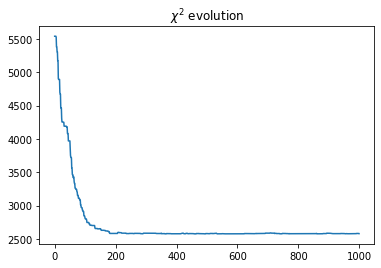

In [3]:
plt.plot(chain1[:,1], '-')
plt.title('$\chi^2$ evolution')

In [4]:
ftH0 = np.fft.rfft(chain1[200:,2]) # remove the burn in period


Text(0.5, 1.0, '$H_0$ fourier space')

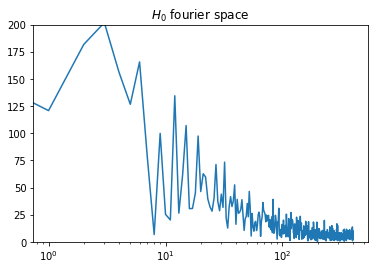

In [5]:
plt.plot(np.abs(ftH0))
plt.xscale('log')
plt.ylim([0,200])
plt.title('$H_0$ fourier space')

It certainly doesn't look anything close to a converged chain. Lot of correlation.

In [6]:
# still let's quickly glance parameter values and stddevs
chnparam = chain1[200:,2:]
print(np.mean(chnparam, axis=0))
print(np.std(chnparam, axis=0))

[6.82386202e+01 2.23725106e-02 1.17663581e-01 8.28927345e-02
 2.21083887e-09 9.72372479e-01]
[9.90952430e-01 2.11623349e-04 2.25311232e-03 2.34344598e-02
 9.96526246e-11 5.94047516e-03]


## Converged Chain analysis for Q3

In [8]:
chain2 = np.loadtxt("./converged_chain_Q3.txt")

In [9]:
chain2

array([[0.000000e+00, 6.711222e+03, 6.343000e+01, ..., 2.686000e-02,
        1.887000e-09, 9.820000e-01],
       [1.000000e+00, 6.711222e+03, 6.343000e+01, ..., 2.686000e-02,
        1.887000e-09, 9.820000e-01],
       [2.000000e+00, 6.711222e+03, 6.343000e+01, ..., 2.686000e-02,
        1.887000e-09, 9.820000e-01],
       ...,
       [7.997000e+03, 2.592046e+03, 6.614000e+01, ..., 9.997000e-02,
        2.312000e-09, 9.629000e-01],
       [7.998000e+03, 2.592046e+03, 6.614000e+01, ..., 9.997000e-02,
        2.312000e-09, 9.629000e-01],
       [7.999000e+03, 2.592354e+03, 6.638000e+01, ..., 7.763000e-02,
        2.202000e-09, 9.690000e-01]])

(2000.0, 7000.0)

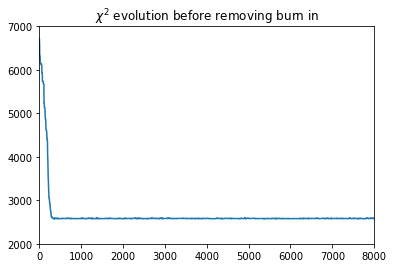

In [10]:
plt.plot(chain2[:,1], '-')
plt.title('$\chi^2$ evolution before removing burn in')
plt.xlim([0,8000])
plt.ylim([2000,7000])

In [11]:
chain2 = chain2[350:,:] # remove burn in
params2 = chain2[:,2:]

In [12]:
param_map = {0: '$H0$', 1: '$\Omega_bh^2$', 2: '$\Omega_ch^2$', 3: '$\\tau$', 4: '$A_s$', 5: '$n_s$'}

(0.0, 8000.0)

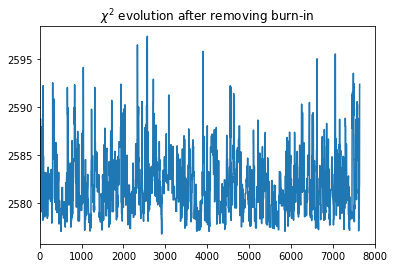

In [13]:
plt.plot(chain2[:,1], '-')
plt.title('$\chi^2$ evolution after removing burn-in')
plt.xlim([0,8000])
# plt.ylim([2570,2600])

In [14]:
params2.shape

(7647, 6)

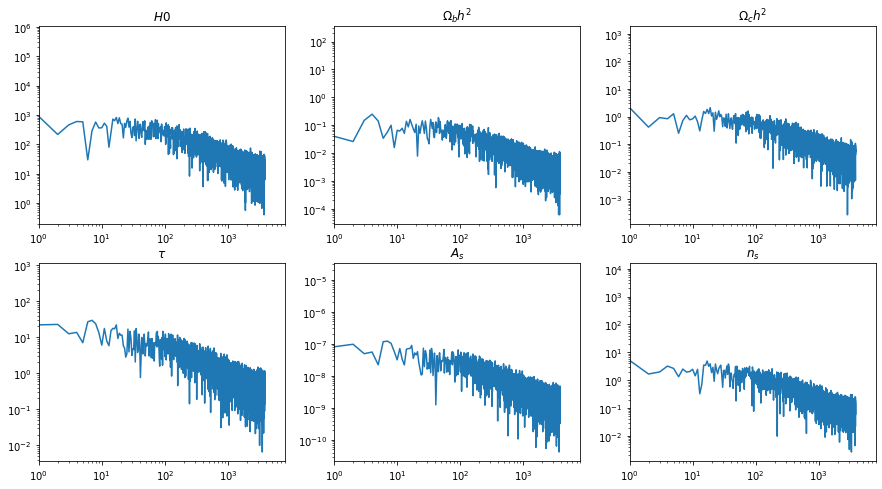

In [15]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,8)
for i, axis in enumerate(ax.ravel()):
    axis.set_title(param_map[i])
    ft = np.fft.rfft(params2[:,i]) # one could normalize y axis to one in fourier space, 
    #but I'm using log-scale so it's not really required
    
    axis.plot(np.abs(ft))
    axis.set_xlim([1,8000])
    axis.set_xscale('log')
    axis.set_yscale('log')



Total channels (range of k in DFT) = 6750. frequency resolution per channel = $\frac{1}{7647} \approx 0.00013 Hz$

Therefore, frequency of channel no. 70 (where the knee occurs in each of above plots) $\approx 0.0091 Hz$

So time period of an independent sample roughly every $\approx 110$ i.e. we get an independent sample roughly every 110 steps.

In [16]:
df = pd.DataFrame(params2,columns=['$H0$','$\Omega_bh^2$','$\Omega_ch^2$', '$\\tau$', '$A_s$', '$n_s$'])

In [17]:
df.describe()

,$H0$,$\Omega_bh^2$,$\Omega_ch^2$,$\tau$,$A_s$,$n_s$
count,7647.000000,7647.000000,7647.000000,7647.000000,7.647000e+03,7647.000000
mean,68.147449,0.022351,0.117961,0.082699,2.211588e-09,0.972555
std,1.070653,0.000220,0.002363,0.026493,1.112821e-10,0.005775
min,64.970000,0.021700,0.110400,0.009139,1.905000e-09,0.954700
25%,67.410000,0.022200,0.116300,0.065135,2.138000e-09,0.968500
50%,68.160000,0.022300,0.117900,0.085700,2.218000e-09,0.972400
75%,68.900000,0.022500,0.119600,0.101100,2.289000e-09,0.976800
max,71.590000,0.023000,0.125500,0.149800,2.508000e-09,0.992900


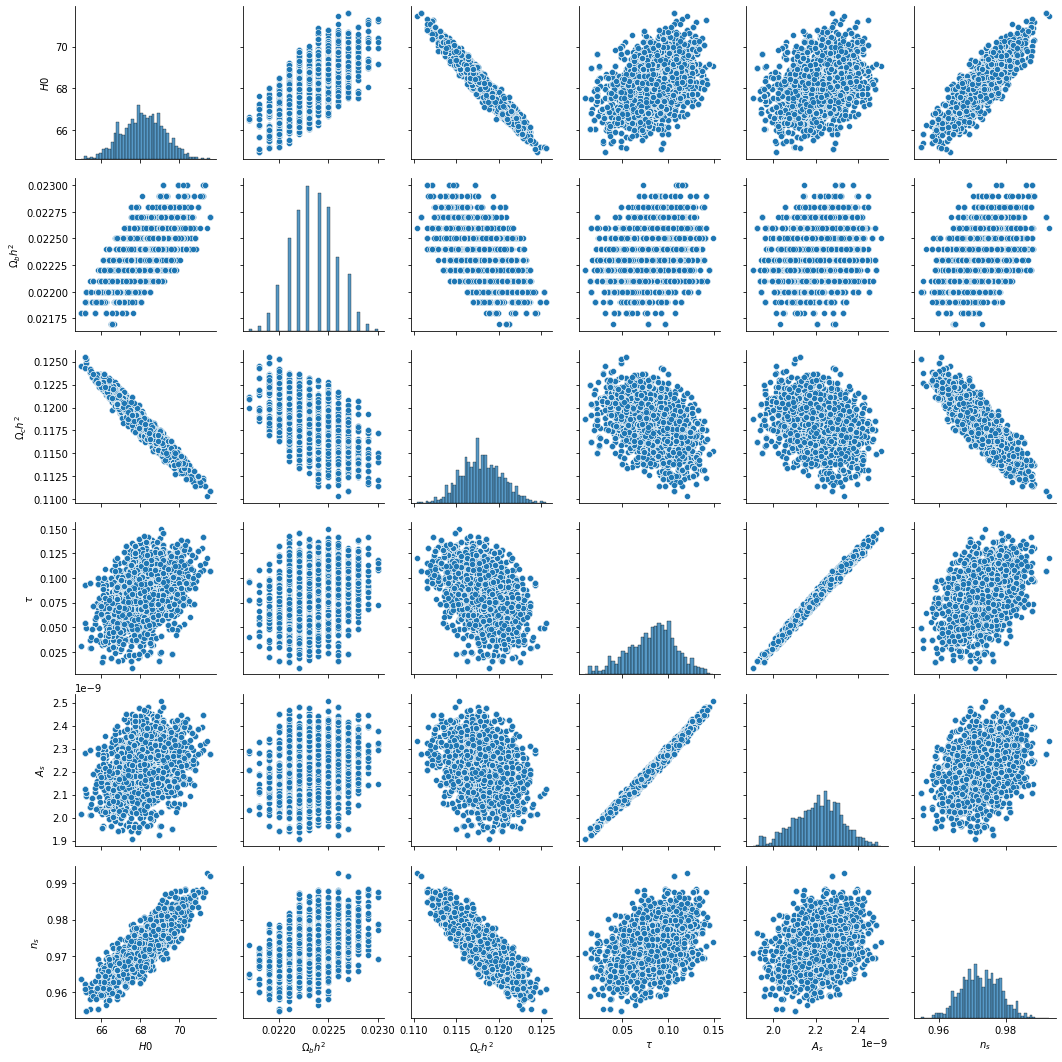

In [114]:
sn.pairplot(df) # without KDE

## _A much better plot is obtained for a longer chain run for Q4 (scroll below), where every parameter is even more densely sampled_

### Error in Dark Energy density

We know that 

$\Omega_b + \Omega_c + \Omega_\Lambda = 1$

Therefore,

$
\big<\Omega_\Lambda\big> = 1 - \big<\Omega_b\big> - \big<\Omega_c\big>
$

and

$Var\big(\Omega_\Lambda\big) = Var\big(\Omega_b\big) + Var\big(\Omega_c\big) + 2Cov\big(\Omega_b,\Omega_c\big)$

There is no need for us to calculate errors using Taylor expansion, etc. because we have already sampled the posterior of our parameter. We can calculate the average of any quantity of interest by averaging over the sampled values -- which, by the defition of _ergodicity_, sample the true underlying posterior distribution when the chain has converged.

Therefore,

$\big<f(m)\big> = \int f(m)P(m)dm = \frac{1}{N}\sum_{1}^{N} f(m_i)$

where $f(m)$ is any function of our parameters, $P(m)$ is the posterior that an ergodic chain samples, and $m_i$'s are the samples in our MCMC chain.

So, we can simply calculate the relevant statistics (mean, covariance) for $\Omega_b$ and $\Omega_c$ from the relevant values of $H_0$, $\Omega_bh^2$, and $\Omega_ch^2$ in the chain.

In [18]:
ohmb = params2[:,1]*10000/params2[:,0]**2
ohmc = params2[:,2]*10000/params2[:,0]**2
ohmb_avg = ohmb.mean()
ohmc_avg = ohmc.mean()
cov_ohmb_ohmc = np.cov(ohmb, ohmc, rowvar=True)

In [19]:
ohmlambda_avg = 1 - ohmb_avg - ohmc_avg
err_ohmlambda = np.sqrt(np.sum(np.ravel(cov_ohmb_ohmc)))
print(f"The value for dark energy fractional density Ohm_lambda is: {ohmlambda_avg:5.4f} +/- {err_ohmlambda:5.4f}")

The value for dark energy fractional density Ohm_lambda is: 0.6975 +/- 0.0142


- This value agrees suprisingly well with Planck results _(Planck Collaboration 2018 results Part VI Cosmological Parameters)_ who quote $0.699 \pm 0.012$ (68% TE+lowE) and $0.6889 \pm 0.0056$ (68% TT, TE, EE+lowE+lensing+BAO) 

### Importance Sampling

Although a prior can take many forms, a gaussian is often most convinient. Our prior on $\tau$ can take the form:
    
$P(\tau) \propto \large e^{\frac{{(\tau-\mu)}^2}{2\sigma^2}} $

where $\mu = 0.0540$ and $\sigma = 0.0074$.

Here, I've skipped the normalization factor because the target distribution that MCMC samples from is also unnormalized. The results will approach the underlying posterior regardless of constant factors (Slutsky's Theorem).

The concept behind Importance sampling is very intuitive. Say we have a converged chain with us, and we want to make some small changes to the posterior by modifying the likelihood or the prior (or both). In such a case, we ask ourselves, "what's the probability that a given point in the old chain may have come from the new posterior?" If we have this probability then we can simply weigh all our points by that probability and calculate all statistics of interest of our parameters, and they would in effect be as if we were using the new posterior. Specifically, assume that the probability is $w_i$ for each point the chain, then the mean and variance of the points from the _new_ posterior can be given as:

$ \big<\mathbf{m}\big> = \large\frac{\sum_{i} w_i \mathbf{m}_i}{\sum_i \mathbf{m}_i}$

$ Var(\mathbf{m}) = \large\frac{\sum_{i} w_i (\mathbf{m}_i - <\mathbf{m}>)^2}{\sum_i w_i} $



The probability $w_i$ as given in any Monte-Carlo literature is just the ratio of our new and old posteriors. That is:

$w_i = \large\frac{\mathcal L(d_i|\mathbf{m}_i)\mathcal{\tilde P} (\mathbf{m}_i)}{\mathcal L(d_i|\mathbf{m}_i) \mathcal P(\mathbf{m}_i)}$

It is important to note here that $i$ represents the points in the chain, $\mathbf{m}$ is a vector of parameters, and the total prior $\mathcal P$ is just:

$\prod_j P_j(m_j)$

where $P_j$ represents prior on parameter $m_j$.

As shown in above equations, in the present case, the likelihood function and the priors on all parameters except $\tau$ remain the same (uniform priors)  in the old and the new posteriors. These factors cancel out in the ratio, and the weight is:

$w_i = P(\tau_i)$


In [25]:
weights = np.exp(-0.5*(params2[:,3]-0.0540)**2/0.0074**2)
# weights = weights.reshape(-1,1)
sum_weights = np.sum(weights)

In [26]:
means = np.average(params2, weights=weights, axis=0)
means = means.reshape(-1,6)
print("  new means are:\n", means)

  new means are:
 [[6.76815324e+01 2.22961745e-02 1.19010002e-01 5.55987341e-02
  2.09838245e-09 9.70148707e-01]]


##### $\tau$ (0.05560) has indeed come down close to it's prior value. $H_0$ is also closer to it's Planck+BAO value.

In [28]:
# let's calculate stddev manually using formula listed above

weights = weights.reshape(-1,1)
num = (params2 - means)**2
np.sqrt(np.sum(weights*num, axis=0)/sum_weights)



array([1.01753857e+00, 2.10533503e-04, 2.29124385e-03, 7.08593088e-03,
       3.07852642e-11, 5.12239567e-03])

In [29]:
# numpy way

param_cov = np.cov(params2, rowvar=False, aweights=weights.reshape(-1))
param_std = np.sqrt(np.diag(param_cov))
print(param_std)

[1.01788123e+00 2.10604400e-04 2.29201542e-03 7.08831705e-03
 3.07956310e-11 5.12412062e-03]


Barring any roundoff errors, parameter standard deviations are matching what we calculate manually and what numpy gives.

### We can now use this new covariance matrix to run a new chain. 

In [30]:
np.savetxt('./param_cov_tau.txt', param_cov)

In [31]:
param_cov

array([[ 1.03608219e+00,  1.47323543e-04, -2.26741196e-03,
         9.72929949e-04, -6.45319855e-12,  4.45502719e-03],
       [ 1.47323543e-04,  4.43542132e-08, -2.68695315e-07,
         2.12557028e-07, -2.46432342e-16,  5.15270685e-07],
       [-2.26741196e-03, -2.68695315e-07,  5.25333470e-06,
        -1.75608532e-06,  1.75376413e-14, -9.92070676e-06],
       [ 9.72929949e-04,  2.12557028e-07, -1.75608532e-06,
         5.02442385e-05,  2.02372899e-13,  4.66131431e-06],
       [-6.45319855e-12, -2.46432342e-16,  1.75376413e-14,
         2.02372899e-13,  9.48370889e-22, -3.39273342e-14],
       [ 4.45502719e-03,  5.15270685e-07, -9.92070676e-06,
         4.66131431e-06, -3.39273342e-14,  2.62566121e-05]])

## New chain with Tau prior, 10k steps

In [40]:
chain3 = np.loadtxt('./converged_chain_Q4.txt')

(0.0, 1000.0)

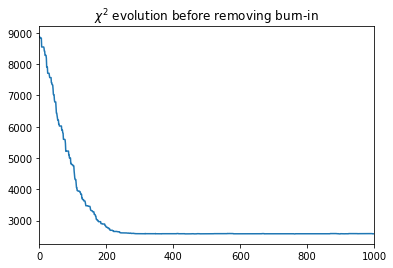

In [41]:
plt.plot(chain3[:,1], '-')
plt.title('$\chi^2$ evolution before removing burn-in')
plt.xlim([0,1000]) 

There are 10,000 steps, showing only 1000 for clarity

In [42]:
chain3 = chain3[400:,:] # remove burn in

(0.0, 9000.0)

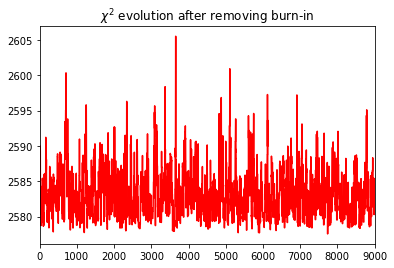

In [43]:
plt.plot(np.arange(1,9601,1),chain3[:,1], 'r-')
plt.title('$\chi^2$ evolution after removing burn-in')
plt.xlim([0,9000]) 

In [44]:
params3 = chain3[:,2:]

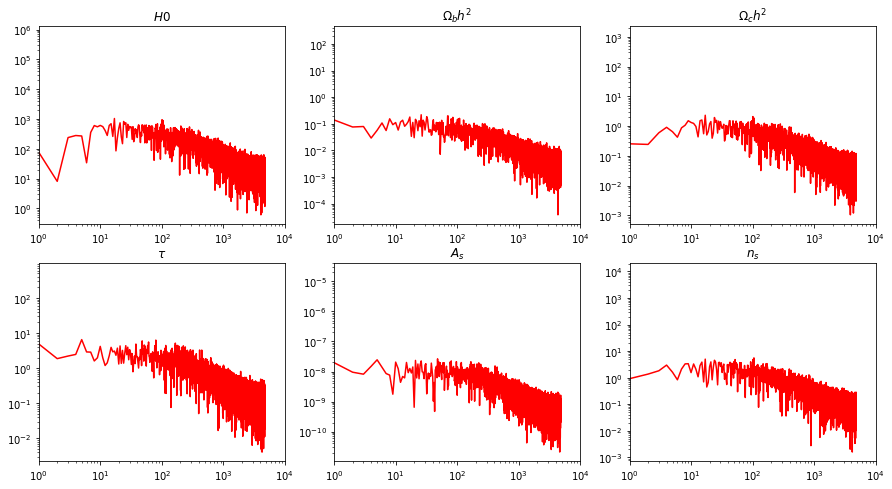

In [45]:

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,8)
for i, axis in enumerate(ax.ravel()):
    axis.set_title(param_map[i])
    ft = np.fft.rfft(params3[:,i]) # normalize y axis to one in fourier space
    axis.plot(np.abs(ft), c='r')
    axis.set_xlim([1,10000])
    axis.set_xscale('log')
    axis.set_yscale('log')

All converged and good looking. 

In [46]:
df3 = pd.DataFrame(params3,columns=['$H0$','$\Omega_bh^2$','$\Omega_ch^2$', '$\\tau$', '$A_s$', '$n_s$'])

In [47]:
df3.describe()

,$H0$,$\Omega_bh^2$,$\Omega_ch^2$,$\tau$,$A_s$,$n_s$
count,9600.000000,9600.000000,9600.000000,9600.000000,9.600000e+03,9600.000000
mean,67.728992,0.022287,0.118801,0.056110,2.099377e-09,0.970284
std,1.039779,0.000219,0.002329,0.007232,3.149347e-11,0.005600
min,64.177619,0.021598,0.109268,0.029108,1.984850e-09,0.950364
25%,67.017933,0.022128,0.117323,0.051039,2.077978e-09,0.966585
50%,67.766313,0.022295,0.118720,0.056049,2.098151e-09,0.970262
75%,68.417561,0.022440,0.120321,0.061072,2.121683e-09,0.974067
max,71.359970,0.022956,0.127238,0.079748,2.212041e-09,0.991934


As we can see, the prior has had its expected effect. Mean value of $\tau$ is down to $0.0561$ as compared to $0.0827$ without a prior.

Furthermore, the values of $\tau$ obtained from running a new chain is very close to what was obtained from importance sampling above. $0.0561$ (chain) vs $0.0556$.

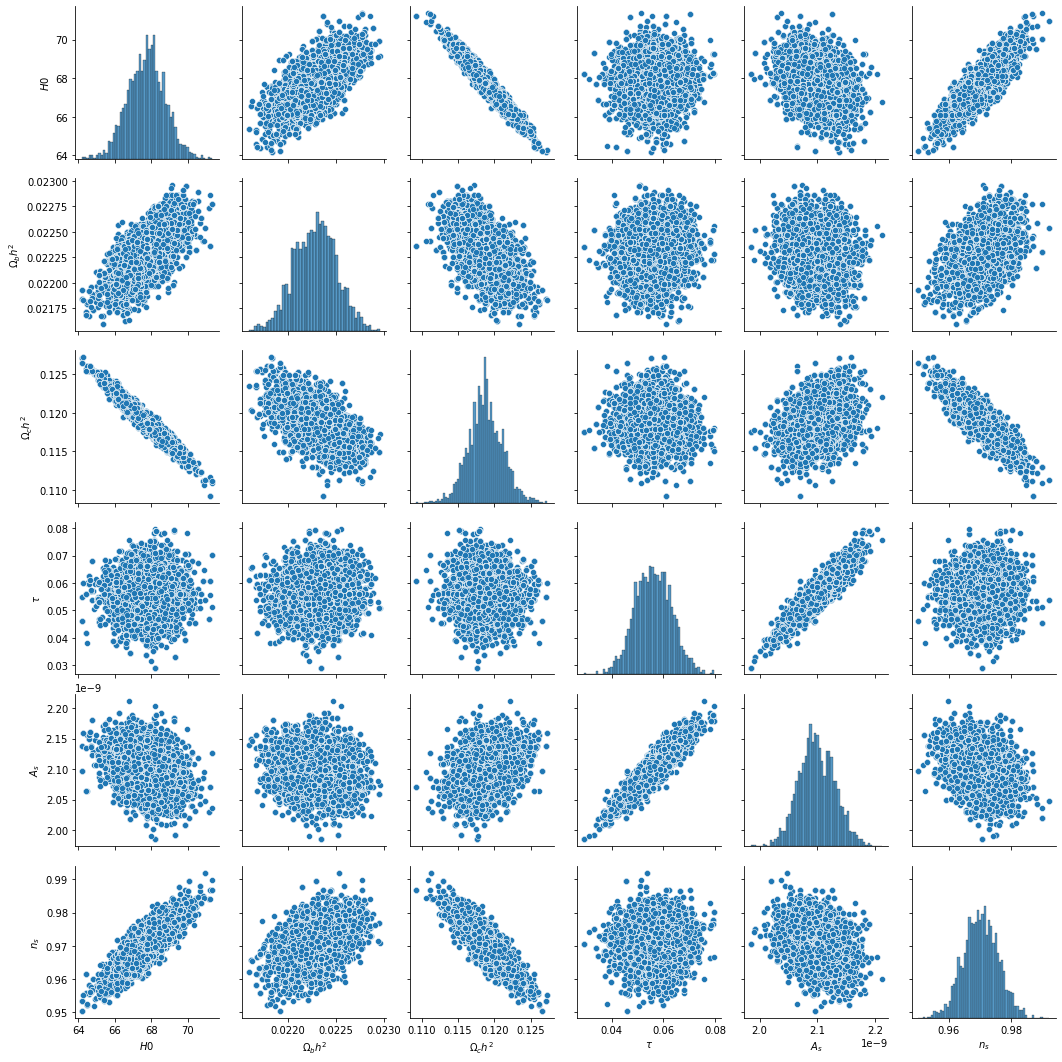

In [123]:
sn.pairplot(df3) # without KDE